In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('UCI_Heart_Disease_Dataset_Combined.csv', header='infer')

# Display the dataset
print(data)

# Get information about the dataset
data.info()

# Display the first 10 rows of the dataset
print(data.head(10))

# Display data types of each column
data_type = data.dtypes
print("Data types are:")
print(data_type)


       Age     Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0     40.0    Male            1.0      140.0        289.0        0.0   
1     49.0  Female            2.0      160.0        180.0        0.0   
2     37.0    Male            1.0      130.0        283.0        0.0   
3     48.0  Female            3.0      138.0        214.0        0.0   
4     54.0    Male            2.0      150.0        195.0        0.0   
...    ...     ...            ...        ...          ...        ...   
2938  59.0    Male            1.0      140.0          0.0        0.0   
2939  60.0    Male            0.0      125.0        258.0        0.0   
2940  47.0    Male            0.0      110.0          0.0        0.0   
2941  50.0  Female            0.0      110.0        254.0        0.0   
2942  54.0    Male            0.0        0.0        188.0        0.0   

      RestingECG  MaxHR  ExerciseAngina  Oldpeak  HeartDisease  
0            0.0  172.0             0.0      0.0           0.0  
1    

In [2]:
 # Drop the null records in rows
 data1 = data.copy()
 data1 = data1.dropna(axis = 0)
 print(data1.shape)
 print(data.shape)

(2917, 11)
(2943, 11)


In [3]:
 # Drop the null records in column
 data2 = data.copy()
 data2 = data2.dropna(axis = 1)
 print(data2.shape)
 print(data.shape)

(2943, 0)
(2943, 11)


In [4]:
# Replace NA values in numerical columns with mean, and in categorical columns with mode
data3 = data.copy()

# Identify numerical and categorical columns
numerical_cols = data3.select_dtypes(include=['float', 'int']).columns
categorical_cols = data3.select_dtypes(include=['object']).columns

# Fill NA values in numerical columns with the mean without using inplace
for col in numerical_cols:
    data3[col] = data3[col].fillna(data3[col].mean())

# Fill NA values in categorical columns with the mode without using inplace
for col in categorical_cols:
    data3[col] = data3[col].fillna(data3[col].mode()[0])

# Check the info of the modified and original data
data3.info()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   float64
 1   Sex             2943 non-null   object 
 2   ChestPainType   2943 non-null   float64
 3   RestingBP       2943 non-null   float64
 4   Cholesterol     2943 non-null   float64
 5   FastingBS       2943 non-null   float64
 6   RestingECG      2943 non-null   float64
 7   MaxHR           2943 non-null   float64
 8   ExerciseAngina  2943 non-null   float64
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   float64
dtypes: float64(10), object(1)
memory usage: 253.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2939 non-null   float64
 1   Sex   

In [5]:
 # Perform statistical analysis on the selected dataset(count, sum, range ,min, max, mean, median, mode, variance and Standard deviation)
 data.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,2939.000000,2941.000000,2940.000000,2941.000000,2940.000000,2940.000000,2940.000000,2941.000000,2939.000000,2940.000000
mean,52.355223,1.364502,138.493537,253.134988,0.225170,0.626871,143.824150,0.412445,1.569309,0.548299
std,13.077154,1.142448,25.275299,113.233486,0.417765,0.713377,29.051925,0.492358,1.585693,0.497746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000
25%,44.000000,0.000000,120.000000,204.000000,0.000000,0.000000,124.000000,0.000000,0.100000,0.000000
50%,54.000000,1.000000,134.000000,248.000000,0.000000,0.000000,145.000000,0.000000,1.200000,1.000000
75%,61.000000,2.000000,150.000000,306.000000,0.000000,1.000000,165.000000,1.000000,2.400000,1.000000
max,80.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [6]:
 # Check data types of columns
 numeric_columns = data.select_dtypes(include=[int, float]).columns
 # Perform sum operation only on numeric columns
 sum = data[numeric_columns].sum()
 print("Sum is:")
 print(sum)

Sum is:
Age               153872.0
ChestPainType       4013.0
RestingBP         407171.0
Cholesterol       744470.0
FastingBS            662.0
RestingECG          1843.0
MaxHR             422843.0
ExerciseAngina      1213.0
Oldpeak             4612.2
HeartDisease        1612.0
dtype: float64


In [7]:
# Calculate and print the range for numeric columns
for column in data.columns:
    if data[column].dtype in [int, float]:  # Check if the column is numeric
        column_values = data[column].dropna()  # Drop missing values
        if len(column_values) > 0:  # Check if there are any non-missing values
            column_range = column_values.max() - column_values.min()
            print(f"Range for column '{column}': {column_range}")
        else:
            print(f"Column '{column}' contains only missing values, skipping...")
    else:
        print(f"Column '{column}' is not numeric, skipping...")


Range for column 'Age': 80.0
Column 'Sex' is not numeric, skipping...
Range for column 'ChestPainType': 3.0
Range for column 'RestingBP': 200.0
Range for column 'Cholesterol': 603.0
Range for column 'FastingBS': 1.0
Range for column 'RestingECG': 2.0
Range for column 'MaxHR': 202.0
Range for column 'ExerciseAngina': 1.0
Range for column 'Oldpeak': 8.8
Range for column 'HeartDisease': 1.0


In [8]:
# Iterate through each column and find the median and mode
for column in data.columns:
    if data[column].dtype in [int, float]:  # Check if the column is numeric
        column_values = data[column].dropna()  # Drop missing values
        
        # Calculate median
        median = column_values.median()
        
        # Calculate mode (taking the first mode in case of multiple modes)
        mode = column_values.mode().values[0] if not column_values.mode().empty else None
        
        # Print results
        print(f"Column '{column}':")
        print(f"Median: {median}")
        print(f"Mode: {mode}\n")
    else:
        print(f"Column '{column}' is not numeric, skipping...\n")


Column 'Age':
Median: 54.0
Mode: 58.0

Column 'Sex' is not numeric, skipping...

Column 'ChestPainType':
Median: 1.0
Mode: 0.0

Column 'RestingBP':
Median: 134.0
Mode: 120.0

Column 'Cholesterol':
Median: 248.0
Mode: 0.0

Column 'FastingBS':
Median: 0.0
Mode: 0.0

Column 'RestingECG':
Median: 0.0
Mode: 0.0

Column 'MaxHR':
Median: 145.0
Mode: 150.0

Column 'ExerciseAngina':
Median: 0.0
Mode: 0.0

Column 'Oldpeak':
Median: 1.2
Mode: 0.0

Column 'HeartDisease':
Median: 1.0
Mode: 1.0



In [9]:
# Iterate through each column and find the variance
for column in data.columns:
    if data[column].dtype in [int, float]:  # Check if the column is numeric
        column_variance = data[column].var()  # Compute variance
        print(f"Variance for column '{column}': {column_variance}")
    else:
        print(f"Column '{column}' is not numeric, skipping...")


Variance for column 'Age': 171.01196301192084
Column 'Sex' is not numeric, skipping...
Variance for column 'ChestPainType': 1.3051884337550048
Variance for column 'RestingBP': 638.8407203847854
Variance for column 'Cholesterol': 12821.82224820564
Variance for column 'FastingBS': 0.17452787171350337
Variance for column 'RestingECG': 0.5089068427643259
Variance for column 'MaxHR': 844.0143196237324
Variance for column 'ExerciseAngina': 0.24241650417392385
Variance for column 'Oldpeak': 2.5144219529803995
Variance for column 'HeartDisease': 0.2477514449127728


In [10]:
# Iterate through each column and display unique value counts and unique values
for column in data.columns:
    unique_values = data[column].unique()  # Get unique values
    value_counts = data[column].value_counts()  # Get value counts
    print(f"Column '{column}':")
    print("Unique values:")
    print(unique_values)
    print("\nValue counts:")
    print(value_counts)
    print("\n")


Column 'Age':
Unique values:
[40. 49. 37. 48. 54. 39. 45. 58. 42. 38. 43. 60. 36. 44. 53. 52. 51. 56.
 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29. 62.
 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. nan 77. 75. 76. 71. 24. 79. 27.
 23. 20. 78. 25. 22. 26. 21. 80.  0.]

Value counts:
Age
58.0    132
54.0    117
57.0    109
59.0    100
52.0     95
       ... 
75.0     14
28.0     13
21.0     12
80.0     12
0.0       1
Name: count, Length: 62, dtype: int64


Column 'Sex':
Unique values:
['Male' 'Female' nan '0']

Value counts:
Sex
Male      2200
Female     739
0            1
Name: count, dtype: int64


Column 'ChestPainType':
Unique values:
[ 1.  2.  3.  0. nan]

Value counts:
ChestPainType
0.0    961
2.0    799
3.0    617
1.0    564
Name: count, dtype: int64


Column 'RestingBP':
Unique values:
[140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128. 106.  92. 200.
 122.  98. 105. 133.  95.  nan  80. 1

1. Histogram Graphs


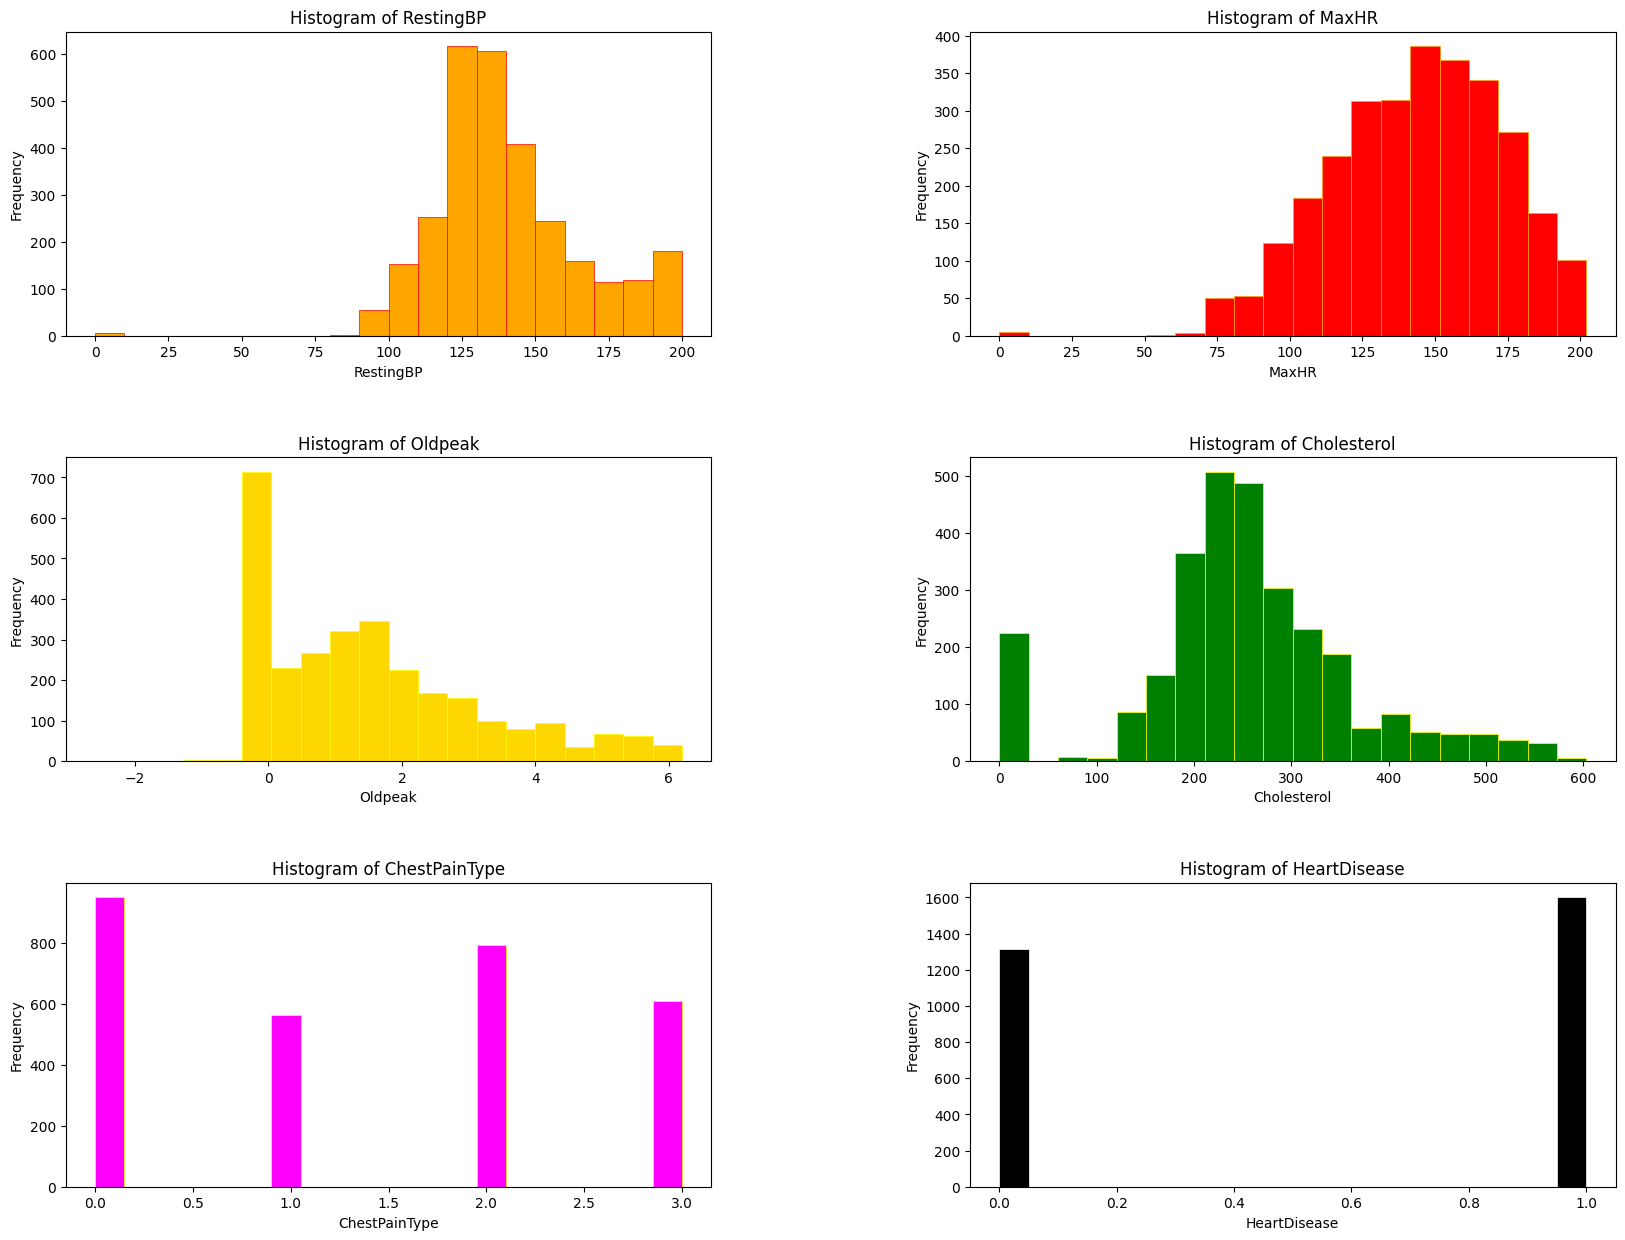

In [11]:
import matplotlib.pyplot as plt

# Copy data and drop rows with missing values
data5 = data.copy()
data5 = data5.dropna()

# Display histogram graphs
print("1. Histogram Graphs")
plt.figure(figsize=(20, 15))  # Adjusted figure size for better layout

# Plot Histogram of RestingBP
plt.subplot(3, 2, 1)
plt.hist(data5['RestingBP'], bins=20, color='orange', edgecolor='red', linewidth=0.5)
plt.title('Histogram of RestingBP')
plt.xlabel("RestingBP")
plt.ylabel("Frequency")

# Plot Histogram of MaxHR
plt.subplot(3, 2, 2)
plt.hist(data5['MaxHR'], bins=20, color='red', edgecolor='orange', linewidth=0.5)
plt.title('Histogram of MaxHR')
plt.xlabel("MaxHR")
plt.ylabel("Frequency")

# Plot Histogram of Oldpeak
plt.subplot(3, 2, 3)
plt.hist(data5['Oldpeak'], bins=20, color='gold', edgecolor='yellow', linewidth=0.5)
plt.title('Histogram of Oldpeak')
plt.xlabel("Oldpeak")
plt.ylabel("Frequency")

# Plot Histogram of Cholesterol
plt.subplot(3, 2, 4)
plt.hist(data5['Cholesterol'], bins=20, color='green', edgecolor='yellow', linewidth=0.5)
plt.title('Histogram of Cholesterol')
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")

# Plot Histogram of ChestPainType
plt.subplot(3, 2, 5)
plt.hist(data5['ChestPainType'], bins=20, color='magenta', edgecolor='yellow', linewidth=0.5)
plt.title('Histogram of ChestPainType')
plt.xlabel("ChestPainType")
plt.ylabel("Frequency")

# Plot Histogram of HeartDisease
plt.subplot(3, 2, 6)
plt.hist(data5['HeartDisease'], bins=20, color='black', edgecolor='white', linewidth=0.5)
plt.title('Histogram of HeartDisease')
plt.xlabel("HeartDisease")
plt.ylabel("Frequency")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()


2. Bar Graphs


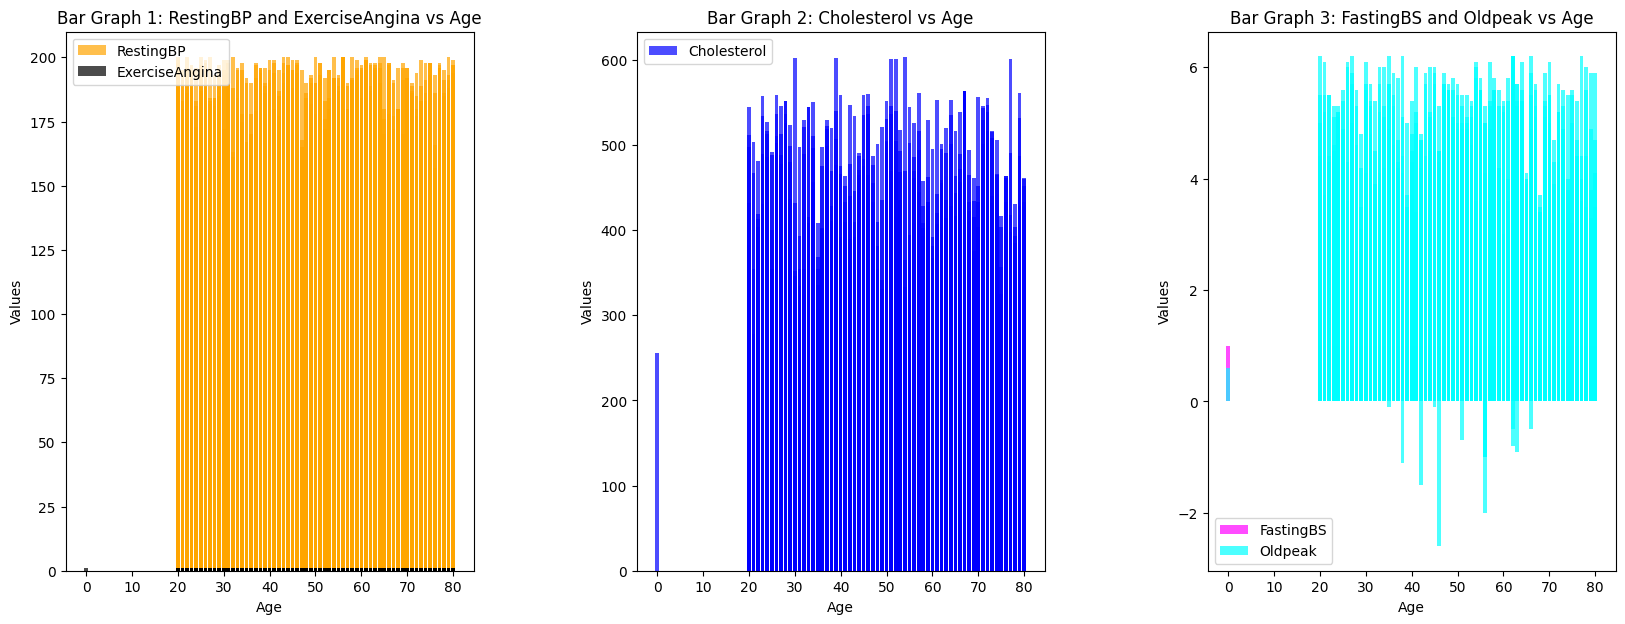

In [12]:
# Display bar graphs
print("2. Bar Graphs")
plt.figure(figsize=(20, 7))

# Bar Graph 1: RestingBP and ExerciseAngina vs Age
plt.subplot(1, 3, 1)
plt.bar(data5['Age'], data5['RestingBP'], color='orange', label='RestingBP', alpha=0.7)
plt.bar(data5['Age'], data5['ExerciseAngina'], color='black', label='ExerciseAngina', alpha=0.7)
plt.title('Bar Graph 1: RestingBP and ExerciseAngina vs Age')
plt.xlabel("Age")
plt.ylabel("Values")
plt.legend()

# Bar Graph 2: ChestPainType and Cholesterol vs Age
plt.subplot(1, 3, 2)
plt.bar(data5['Age'], data5['Cholesterol'], color='blue', label='Cholesterol', alpha=0.7)
plt.title('Bar Graph 2: Cholesterol vs Age')
plt.xlabel("Age")
plt.ylabel("Values")
plt.legend()

# Bar Graph 3: FastingBS and Oldpeak vs Age
plt.subplot(1, 3, 3)
plt.bar(data5['Age'], data5['FastingBS'], color='magenta', label='FastingBS', alpha=0.7)
plt.bar(data5['Age'], data5['Oldpeak'], color='cyan', label='Oldpeak', alpha=0.7)
plt.title('Bar Graph 3: FastingBS and Oldpeak vs Age')
plt.xlabel("Age")
plt.ylabel("Values")
plt.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()

3. Line Graphs


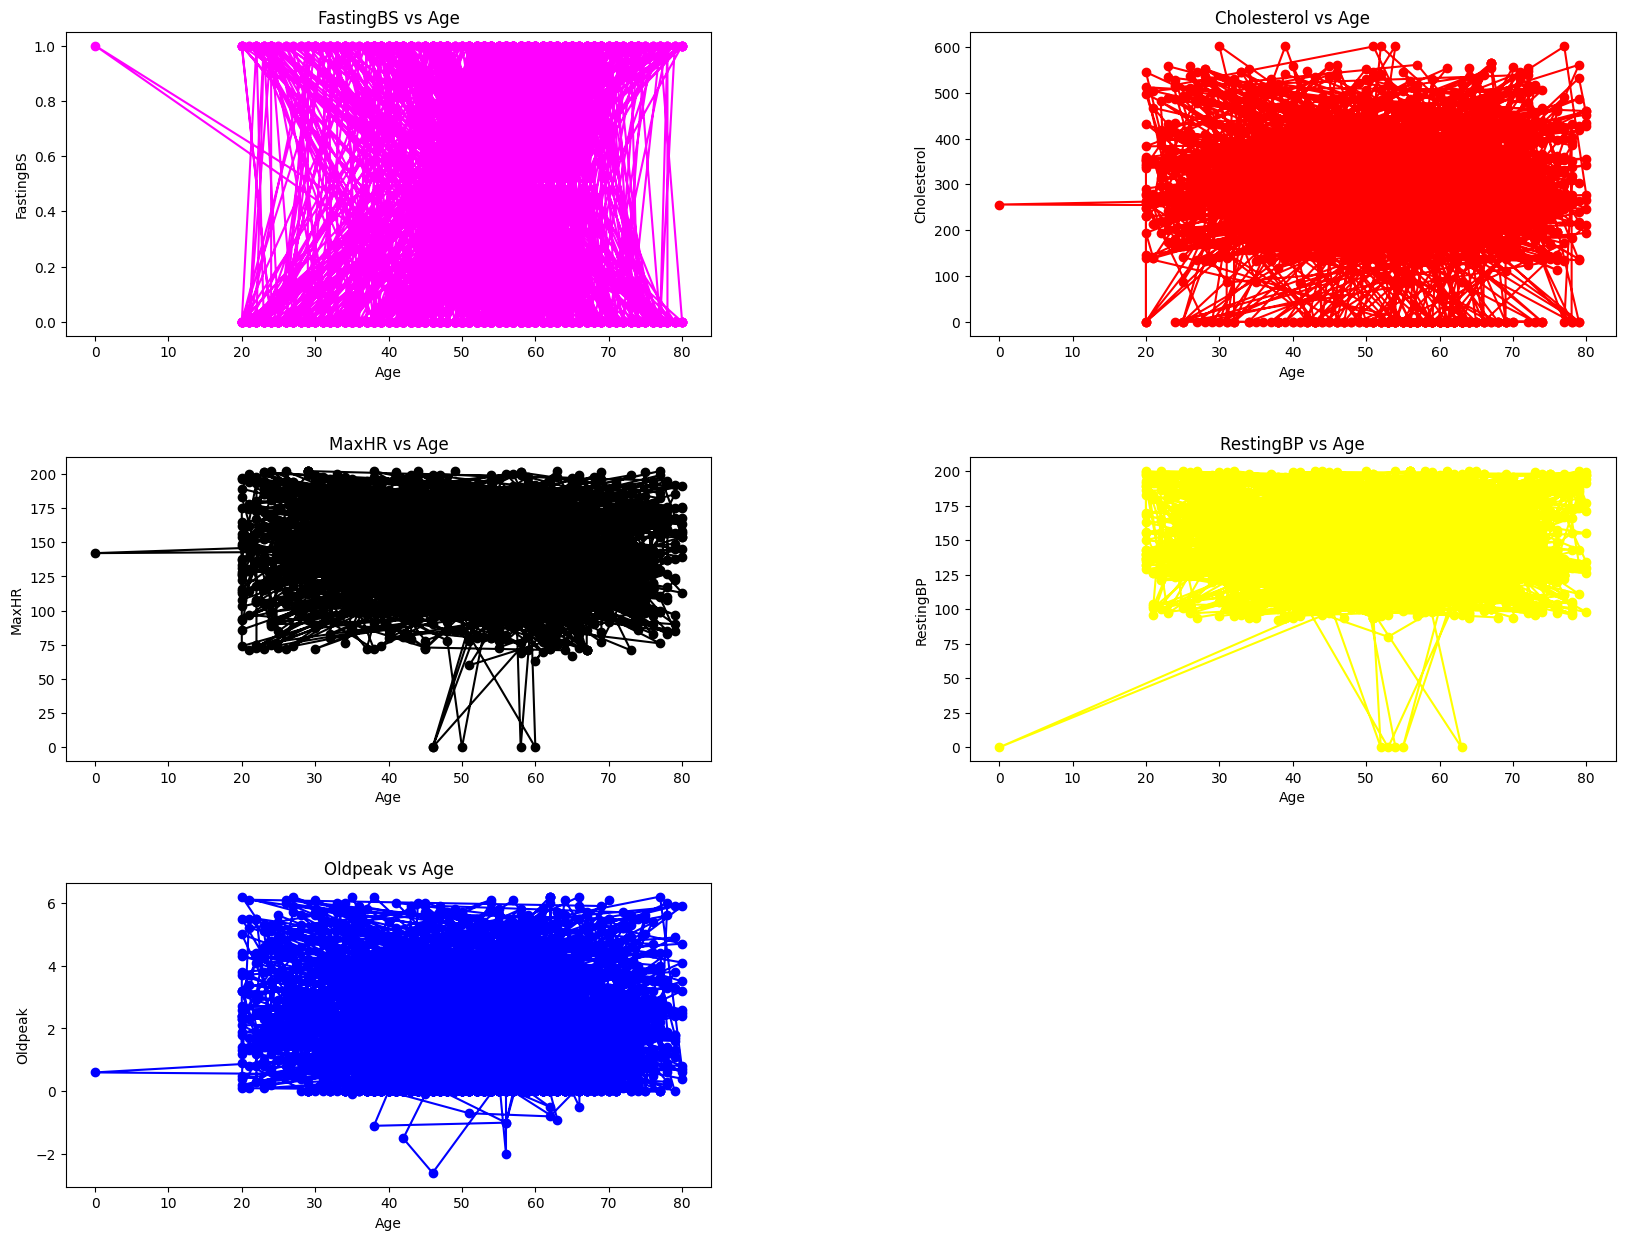

In [13]:
# Display line graphs
print("3. Line Graphs")
plt.figure(figsize=(20, 15))

# Line Graph 1: FastingBS vs Age
plt.subplot(3, 2, 1)
plt.plot(data5['Age'], data5['FastingBS'], color='magenta', linestyle='-', marker='o')
plt.title('FastingBS vs Age')
plt.xlabel("Age")
plt.ylabel("FastingBS")

# Line Graph 2: Cholesterol vs Age
plt.subplot(3, 2, 2)
plt.plot(data5['Age'], data5['Cholesterol'], color='red', linestyle='-', marker='o')
plt.title('Cholesterol vs Age')
plt.xlabel("Age")
plt.ylabel("Cholesterol")

# Line Graph 3: MaxHR vs Age
plt.subplot(3, 2, 3)
plt.plot(data5['Age'], data5['MaxHR'], color='black', linestyle='-', marker='o')
plt.title('MaxHR vs Age')
plt.xlabel("Age")
plt.ylabel("MaxHR")

# Line Graph 4: RestingBP vs Age
plt.subplot(3, 2, 4)
plt.plot(data5['Age'], data5['RestingBP'], color='yellow', linestyle='-', marker='o')
plt.title('RestingBP vs Age')
plt.xlabel("Age")
plt.ylabel("RestingBP")

# Line Graph 5: Oldpeak vs Age
plt.subplot(3, 2, 5)
plt.plot(data5['Age'], data5['Oldpeak'], color='blue', linestyle='-', marker='o')
plt.title('Oldpeak vs Age')
plt.xlabel("Age")
plt.ylabel("Oldpeak")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()


4. Scatter Graphs


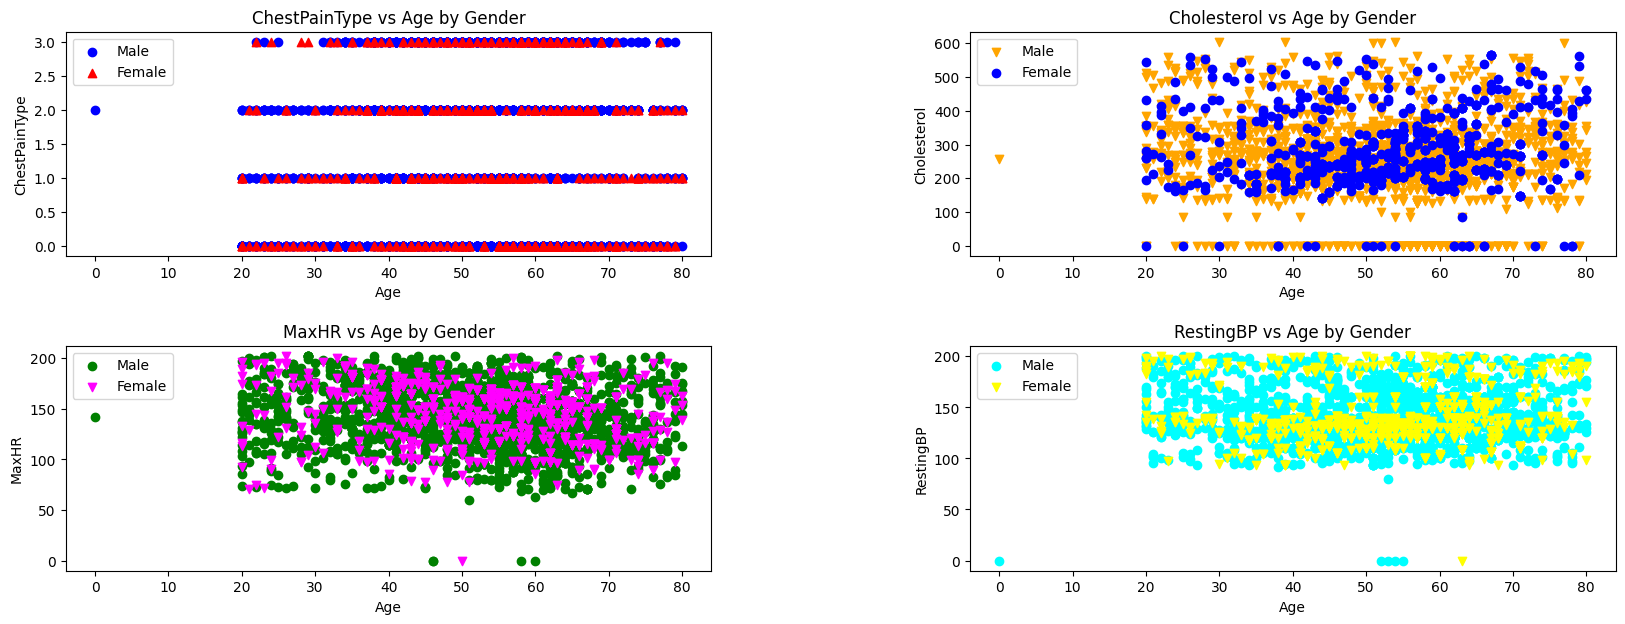

In [14]:
# Scatter plots by Gender
print("4. Scatter Graphs")
# Splitting data into Male and Female
X = data[data['Sex'] == 'Male']
Y = data[data['Sex'] == 'Female']

plt.figure(figsize=(20, 7))

# Scatter Graph 1: ChestPainType vs Age by Gender
plt.subplot(2, 2, 1)
plt.scatter(X['Age'], X['ChestPainType'], color='blue', marker='o', label='Male')
plt.scatter(Y['Age'], Y['ChestPainType'], color='red', marker='^', label='Female')
plt.xlabel('Age')
plt.ylabel('ChestPainType')
plt.title('ChestPainType vs Age by Gender')
plt.legend(loc='best')

# Scatter Graph 2: Cholesterol vs Age by Gender
plt.subplot(2, 2, 2)
plt.scatter(X['Age'], X['Cholesterol'], color='orange', marker='v', label='Male')
plt.scatter(Y['Age'], Y['Cholesterol'], color='blue', marker='o', label='Female')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Cholesterol vs Age by Gender')
plt.legend(loc='best')

# Scatter Graph 3: MaxHR vs Age by Gender
plt.subplot(2, 2, 3)
plt.scatter(X['Age'], X['MaxHR'], color='green', marker='o', label='Male')
plt.scatter(Y['Age'], Y['MaxHR'], color='magenta', marker='v', label='Female')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('MaxHR vs Age by Gender')
plt.legend(loc='best')

# Scatter Graph 4: RestingBP vs Age by Gender
plt.subplot(2, 2, 4)
plt.scatter(X['Age'], X['RestingBP'], color='cyan', marker='o', label='Male')
plt.scatter(Y['Age'], Y['RestingBP'], color='yellow', marker='v', label='Female')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('RestingBP vs Age by Gender')
plt.legend(loc='best')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()


In [15]:
 data4 = data.copy()
 data4['Sex'] = data4['Sex'].replace({'Male': 1, 'Female': 0})
 data4 = data4.dropna()
 X = data4.drop(columns=['HeartDisease']) # Features
 y = data4['HeartDisease'] # Target variable
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
 #This ensures that the data is split in the same way every time the code is run, which is useful for debugging, testing, and comparing different models
 k = int(input("Enter the number of nearest neighbors to be used : "))
 model = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 accuracy = accuracy_score(y_test, pred)
 print("Accuracy:", accuracy)
 print("Classification Report:")
 print(classification_report(y_test, pred))
 print("Confusion Matrix:")
 print(confusion_matrix(y_test, pred))

Enter the number of nearest neighbors to be used :  6


Accuracy: 0.726027397260274
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       268
         1.0       0.73      0.78      0.76       316

    accuracy                           0.73       584
   macro avg       0.73      0.72      0.72       584
weighted avg       0.73      0.73      0.72       584

Confusion Matrix:
[[177  91]
 [ 69 247]]
